In [1]:
## This file extracts sentiments for selftext column

#from transformers import pipeline
import numpy as np
import pandas as pd

#classifier = pipeline('zero-shot-classification', model='facebook/bart-large-mnli')
#import tensorflow as tf

#pip install --upgrade transformers
#from transformers import pipeline
#classifier = pipeline('zero-shot-classification', model="joeddav/xlm-roberta-large-xnli")
#classifier("So my PUA ended on 2/7/21 and I was automatically put on PEUC but I haven’t gotten paid in 5 weeks. Now all my certified weeks went from ‘Not Paid’ to ‘Disqualification.’ I spoke with at least 4 reps today alone and none of them could help me. I have no idea what to do and need some help.", labels)

import torch 
from transformers import pipeline
classifier = pipeline('zero-shot-classification', model='facebook/bart-large-mnli')

labels = ["artifacts", "animals", "food", "birds"]
hypothesis_template = 'This text is about {}.'
sequence = "I like hot dogs"

prediction = classifier(sequence, labels, hypothesis_template=hypothesis_template, multi_class=True)
print(prediction)


Downloading:   0%|          | 0.00/908 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


{'sequence': 'I like hot dogs', 'labels': ['food', 'animals', 'artifacts', 'birds'], 'scores': [0.9971157312393188, 0.004476555623114109, 0.0022816951386630535, 0.0003222838568035513]}


In [113]:

# Use the random sample!
dfsample = pd.read_pickle("random_sample20.pkl")


In [3]:
# Setting up for Maya: between Jimin and Botir

## Note: Reindexing and segmenting sample because it broke in the middle--starting from row 5058
df2_v2 = dfsample.loc[6420:8420]
df2_v2 = df2_v2.sort_values(by=["created_at_date", "author"],ignore_index=True)
df2_v2 = df2_v2.reset_index(drop=True)
df2_v2

,author_flair_text,author,author_premium,awarders,can_mod_post,gildings,is_meta,is_original_content,is_self,is_video,...,num_crossposts,pwls,selftext,score,title,total_awards_received,upvote_ratio,created_utc,created_at_date,removed
0,None,[deleted],NaN,[],False,{},False,False,True,False,...,0,7,[deleted]\n\n[View Poll](https://www.reddit.co...,1,[California] Identity Verification Timeline Poll,0,1.0,1595366061,2020-07-21 21:14:21,False
1,None,throwaway_5011,False,[],False,{},False,False,True,False,...,0,7,I am a school employee for a school district a...,1,[California] School Employee/School Supportive...,0,1.0,1595366580,2020-07-21 21:23:00,False
2,None,Tombro1984,False,[],False,{},False,False,True,False,...,0,7,"So, not to sound like a total tool, but I was ...",1,[Arizona] Question,0,1.0,1595367576,2020-07-21 21:39:36,False
3,None,Mr_Snub,False,[],False,{},False,False,True,False,...,0,7,"To preface, I suffer from Bipolar 2. Sometimes...",11,[California] This whole stressful fiasco is ma...,0,0.7,1595368047,2020-07-21 21:47:27,False
4,None,Jackson1014,False,[],False,{},False,False,False,False,...,0,7,,1,[Illinois] What does this mean? I filed for un...,0,1.0,1595368530,2020-07-21 21:55:30,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,None,fastingmonkmode,False,[],False,{},False,False,True,False,...,0,7,I got my 600 today. We should get the full 150...,1,[California] so we got approved for 5 weeks an...,0,1.0,1599694572,2020-09-09 23:36:12,False
1997,Washington,EarProgrammatically4,False,[],False,{},False,False,True,False,...,0,7,I understand that PUA benefits ended in July. ...,1,"[Washington] Alert still says ""Apply for a Cov...",0,1.0,1599695796,2020-09-09 23:56:36,False
1998,None,onlyinthemornings,False,[],False,{},False,False,False,False,...,0,7,,1,Got this regarding Fed-ed but my claim is stil...,0,1.0,1599697187,2020-09-10 00:19:47,False
1999,None,onlyinthemornings,False,[],False,{},False,False,True,False,...,0,7,Got approved for federal extension but my clai...,1,[California] Will sight maintenance update my ...,0,1.0,1599703108,2020-09-10 01:58:28,False


In [7]:
## add labels positive, negative, anxious, scared, angry, frustrated, hopeful, excited, optimistic, satisfied, dissatisfied, confused, happy 
## function for extracting sentiments
def get_sentiments_for_comments(df, labels):
#     labels=["positive", "negative", "anxious", "scared", "angry", "frustrated", "hopeful", "excited", "optimistic", "satisfied", "dissatisfied", "confused", "happy"]
    for i, comment in enumerate(df['selftext'].tolist()):
        if isinstance(comment, str) == False:
            continue
        if comment and not comment.isspace():
            output = classifier(comment, labels,
                   hypothesis_template=hypothesis_template,
                   multi_label=True)
            dictionary = dict(zip(output['labels'], output['scores']))
            for key in dictionary:
                df.loc[i, key] = dictionary[key]
            #save df to pickle
            #NOTE: CHANGED FOR MAYA
            df.to_pickle("selftext_middle2000_maya.pkl")
        print(i)
    return(df)      
labels=["positive", "negative", "anxious", "scared", "angry", "frustrated", "hopeful", "excited", "optimistic", "satisfied", "dissatisfied", "confused", "happy"]
for label in labels:
    df2_v2[label] = None

df_lab2 = get_sentiments_for_comments(df2_v2, labels) 
df_lab2

0
1
2
3
4
5
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
45
46
47
48
49
50
51
52
55
56
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
146
147
148
149
150
151
152
153
156
157
158
159
160
161
163
164
165
166
168
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
2

1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000


,author_flair_text,author,author_premium,awarders,can_mod_post,gildings,is_meta,is_original_content,is_self,is_video,...,scared,angry,frustrated,hopeful,excited,optimistic,satisfied,dissatisfied,confused,happy
0,None,[deleted],NaN,[],False,{},False,False,True,False,...,0.640351,0.893861,0.906715,0.322268,0.33608,0.368946,0.60003,0.975132,0.88632,0.072942
1,None,throwaway_5011,False,[],False,{},False,False,True,False,...,0.712289,0.449496,0.804628,0.439375,0.05497,0.229161,0.474314,0.912293,0.988257,0.041337
2,None,Tombro1984,False,[],False,{},False,False,True,False,...,0.855257,0.868364,0.947812,0.081865,0.012269,0.007705,0.002791,0.984138,0.990653,0.001584
3,None,Mr_Snub,False,[],False,{},False,False,True,False,...,0.780566,0.882801,0.986569,0.001633,0.003632,0.000638,0.036298,0.985545,0.872253,0.001265
4,None,Jackson1014,False,[],False,{},False,False,False,False,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,None,fastingmonkmode,False,[],False,{},False,False,True,False,...,0.357444,0.042808,0.300431,0.474722,0.025665,0.362162,0.44875,0.471993,0.105267,0.072909
1997,Washington,EarProgrammatically4,False,[],False,{},False,False,True,False,...,0.61367,0.506693,0.880567,0.74778,0.377848,0.76461,0.158268,0.828596,0.986688,0.098599
1998,None,onlyinthemornings,False,[],False,{},False,False,False,False,...,None,None,None,None,None,None,None,None,None,None
1999,None,onlyinthemornings,False,[],False,{},False,False,True,False,...,0.191147,0.632198,0.923032,0.120664,0.006412,0.012884,0.012347,0.981083,0.983429,0.006491


In [19]:
df_lab2.to_pickle("maya_sentiments_6420_to_8420xxxx.pkl")

In [23]:
def get_sentiments_for_comments(df, labels):
#     labels=["positive", "negative", "anxious", "scared", "angry", "frustrated", "hopeful", "excited", "optimistic", "satisfied", "dissatisfied", "confused", "happy"]
    for i, comment in enumerate(df['selftext'].tolist()):
        if isinstance(comment, str) == False:
            continue
        if comment and not comment.isspace():
            output = classifier(comment, labels,
                   hypothesis_template=hypothesis_template,
                   multi_label=True)
            dictionary = dict(zip(output['labels'], output['scores']))
            for key in dictionary:
                df.loc[i, key] = dictionary[key]
            #save df to pickle
            #NOTE: CHANGED FOR MAYA
            df.to_pickle("selftext_middle2000_maya.pkl")
        print(i)
    return(df)      



In [61]:
df3_v2 = dfsample.loc[4420:6419]
df3_v2 = df3_v2.sort_values(by=["created_at_date", "author"],ignore_index=True)
df3_v2 = df3_v2.reset_index(drop=True)

labels=["positive", "negative", "anxious", "scared", "angry", "frustrated", "hopeful", "excited", "optimistic", "satisfied", "dissatisfied", "confused", "happy"]
for label in labels:
    df3_v2[label] = None
df3_v2


,author_flair_text,author,author_premium,awarders,can_mod_post,gildings,is_meta,is_original_content,is_self,is_video,...,scared,angry,frustrated,hopeful,excited,optimistic,satisfied,dissatisfied,confused,happy
0,None,kenlyman,False,[],False,{},False,False,True,False,...,None,None,None,None,None,None,None,None,None,None
1,None,[deleted],NaN,[],False,{},False,False,True,False,...,None,None,None,None,None,None,None,None,None,None
2,None,Mr_Wrong67,False,[],False,{},False,False,True,False,...,None,None,None,None,None,None,None,None,None,None
3,None,Pecorino2x,False,[],False,{},False,False,True,False,...,None,None,None,None,None,None,None,None,None,None
4,None,migrvne,False,[],False,{},False,False,True,False,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,None,[deleted],NaN,[],False,{},False,False,False,False,...,None,None,None,None,None,None,None,None,None,None
1996,None,BillyTheAwesomeGoat,False,[],False,{},False,False,True,False,...,None,None,None,None,None,None,None,None,None,None
1997,None,desmost,False,[],False,{},False,False,True,False,...,None,None,None,None,None,None,None,None,None,None
1998,None,KittensNhoes,False,[],False,{},False,False,True,False,...,None,None,None,None,None,None,None,None,None,None


In [62]:
df_lab3 = get_sentiments_for_comments(df3_v2, labels) 
df_lab3

0
1
2
3
4
6
7
8
9
10
11
12
13
14
16
17
20
21
22
23
24
25
27
28
31
33
34
35
36
37
38
39
40
42
43
44
45
46
47
48
49
50
51
52
54
55
56
57
58
59
60
61
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
87
88
89
91
92
93
94
95
96
97
98
99
100
102
103
104
105
107
108
109
110
112
113
114
115
116
117
118
120
121
122
123
124
125
126
127
128
129
130
132
133
134
135
137
139
140
141
142
143
144
145
146
147
148
149
151
152
153
154
155
158
159
160
161
162
164
165
166
168
169
170
171
172
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
195
196
198
199
200
201
202
204
205
206
208
209
210
211
212
213
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
234
235
236
237
238
239
240
241
242
243
244
245
248
249
250
251
253
254
256
257
258
259
260
261
262
263
264
265
266
267
268
269
272
273
274
275
277
278
279
280
281
283
284
285
287
291
292
293
294
295
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319


1998
1999


,author_flair_text,author,author_premium,awarders,can_mod_post,gildings,is_meta,is_original_content,is_self,is_video,...,scared,angry,frustrated,hopeful,excited,optimistic,satisfied,dissatisfied,confused,happy
0,None,kenlyman,False,[],False,{},False,False,True,False,...,0.958674,0.847036,0.949085,0.840117,0.292045,0.605436,0.405765,0.95656,0.985946,0.105827
1,None,[deleted],NaN,[],False,{},False,False,True,False,...,0.25596,0.483884,0.537105,0.007822,0.017707,0.007055,0.043231,0.847021,0.471247,0.018956
2,None,Mr_Wrong67,False,[],False,{},False,False,True,False,...,0.990632,0.679725,0.963188,0.245375,0.065356,0.102753,0.46108,0.962102,0.993307,0.040731
3,None,Pecorino2x,False,[],False,{},False,False,True,False,...,0.599601,0.061518,0.677904,0.530707,0.131354,0.290864,0.240505,0.504371,0.962488,0.0513
4,None,migrvne,False,[],False,{},False,False,True,False,...,0.648277,0.184066,0.655906,0.542621,0.076447,0.32679,0.181595,0.789851,0.950854,0.04901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,None,[deleted],NaN,[],False,{},False,False,False,False,...,0.25596,0.483884,0.537105,0.007822,0.017707,0.007055,0.043231,0.847021,0.471247,0.018956
1996,None,BillyTheAwesomeGoat,False,[],False,{},False,False,True,False,...,0.853202,0.824809,0.95674,0.536161,0.186522,0.188383,0.316015,0.964839,0.982807,0.045419
1997,None,desmost,False,[],False,{},False,False,True,False,...,0.684969,0.319126,0.812715,0.651858,0.086659,0.578456,0.149856,0.942394,0.985687,0.037919
1998,None,KittensNhoes,False,[],False,{},False,False,True,False,...,0.862743,0.344721,0.792397,0.028266,0.073615,0.032036,0.192513,0.772756,0.993566,0.002662


In [63]:
df_lab3

,author_flair_text,author,author_premium,awarders,can_mod_post,gildings,is_meta,is_original_content,is_self,is_video,...,scared,angry,frustrated,hopeful,excited,optimistic,satisfied,dissatisfied,confused,happy
0,None,kenlyman,False,[],False,{},False,False,True,False,...,0.958674,0.847036,0.949085,0.840117,0.292045,0.605436,0.405765,0.95656,0.985946,0.105827
1,None,[deleted],NaN,[],False,{},False,False,True,False,...,0.25596,0.483884,0.537105,0.007822,0.017707,0.007055,0.043231,0.847021,0.471247,0.018956
2,None,Mr_Wrong67,False,[],False,{},False,False,True,False,...,0.990632,0.679725,0.963188,0.245375,0.065356,0.102753,0.46108,0.962102,0.993307,0.040731
3,None,Pecorino2x,False,[],False,{},False,False,True,False,...,0.599601,0.061518,0.677904,0.530707,0.131354,0.290864,0.240505,0.504371,0.962488,0.0513
4,None,migrvne,False,[],False,{},False,False,True,False,...,0.648277,0.184066,0.655906,0.542621,0.076447,0.32679,0.181595,0.789851,0.950854,0.04901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,None,[deleted],NaN,[],False,{},False,False,False,False,...,0.25596,0.483884,0.537105,0.007822,0.017707,0.007055,0.043231,0.847021,0.471247,0.018956
1996,None,BillyTheAwesomeGoat,False,[],False,{},False,False,True,False,...,0.853202,0.824809,0.95674,0.536161,0.186522,0.188383,0.316015,0.964839,0.982807,0.045419
1997,None,desmost,False,[],False,{},False,False,True,False,...,0.684969,0.319126,0.812715,0.651858,0.086659,0.578456,0.149856,0.942394,0.985687,0.037919
1998,None,KittensNhoes,False,[],False,{},False,False,True,False,...,0.862743,0.344721,0.792397,0.028266,0.073615,0.032036,0.192513,0.772756,0.993566,0.002662


In [64]:
df_lab3.to_pickle("maya_sentiments_4420_to_6419.pkl")

In [31]:
df_lab3.loc[2]['selftext']


"So I've been waiting to receive my Unemployment benefits since early May and I just received thrn my deposit is pending at my bank. But I had an opportunity to work temporarily and have been working for about 2 weeks now and have claimed all the income I've received from this temp job while waiting on benefits. I claimed the money I made but will I lose my benefits now? Im worried I'm gonna lose my benefits and my temporary job all at once? Do you guys have any clue as to what might happen?"

In [114]:
dfsample2 = dfsample

In [57]:
count = dfsample2['format_selftext'].str.split().apply(len).value_counts()
count

0      1655
1       275
48       95
44       95
58       94
       ... 
388       1
412       1
420       1
468       1
895       1
Name: format_selftext, Length: 520, dtype: int64

In [58]:
# asdf = dfsample['selftext'].apply(isinstance()) 
def format_str(selftext):
    if(isinstance(selftext, str) == False):
        return("")
    else:
        return selftext


        
dfsample2['format_selftext'] = dfsample2.apply(lambda x: format_str(x['selftext']),axis=1)
dfsample2['selftext_words'] = dfsample2.apply(lambda x: len(x['format_selftext'].split()),axis=1)

In [59]:
dfsample2['selftext_words']

0         23
1          0
2        126
3        183
4        141
        ... 
11415     27
11416    219
11417     15
11418     72
11419    186
Name: selftext_words, Length: 11420, dtype: int64

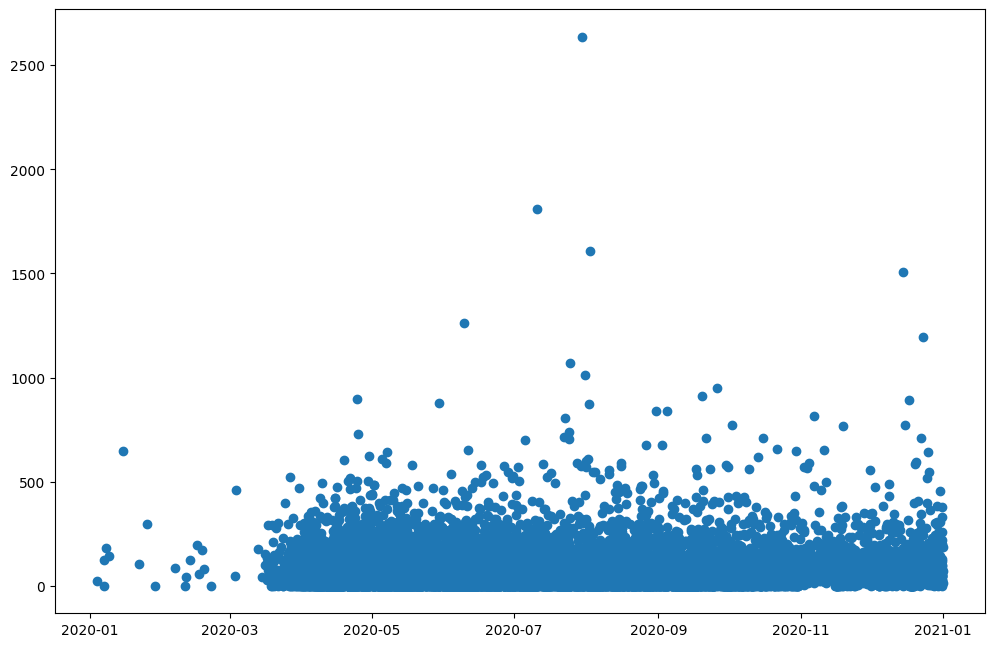

In [54]:
import matplotlib.pyplot as plt


from matplotlib.pyplot import figure
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

plt.scatter(dfsample2['created_at_date'], dfsample2['selftext_words'])
plt.show() # Depending on whether you use IPython or interactive mode, etc.

# dfsample.plot(x='created_at_date', y='selftext_words', style='o')

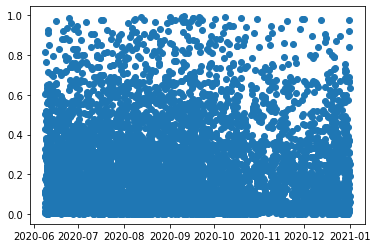

In [68]:
df1 = pd.read_pickle("maya_sentiments_last_7000.pkl")
plt.scatter(df1['created_at_date'], df1['optimistic'])
 # Depending on whether you use IPython or interactive mode, etc.

# m, b = np.polyfit(df1['created_at_date'], df1['optimistic'], 1)
# m = slope, b=intercept

# plt.plot(x, m*x + b)
plt.show()

In [69]:
df1['created_at_date']

0      2020-06-08 18:10:25
1      2020-06-08 18:21:15
2      2020-06-08 18:26:05
3      2020-06-08 18:28:32
4      2020-06-08 19:10:45
               ...        
6995   2020-12-31 22:20:32
6996   2020-12-31 22:24:38
6997   2020-12-31 23:17:17
6998   2020-12-31 23:28:28
6999   2020-12-31 23:35:31
Name: created_at_date, Length: 7000, dtype: datetime64[ns]

In [ ]:
x = [datetime.datetime.strptime(i, '%Y/%M/%D').toordinal() for i in x]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, x))

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, mymodel)

# instruct matplotlib on how to convert the numbers back into dates for the x-axis
l = matplotlib.dates.AutoDateLocator()
f = matplotlib.dates.AutoDateFormatter(l)
ax.xaxis.set_major_locator(l)
ax.xaxis.set_major_formatter(f)
plt.show()

In [93]:
# extract the questions in the text
import re
import sys

text = df1.loc[0]['selftext']
pat = re.compile(r'([A-Z][^\.!?]*[\?])', re.M)
pat.findall(text)





['How will this effect my unemployment?',
 'Will i still receive the $600 week until the end of July?',
 'At what point do i become ineligible for that?',
 'My main question I guess is how will this effect my unemployment?',
 'Will I still get the $600/week?',
 'Will EDD fill the gap between the $450/week we were getting as long as we make less than that?']

In [115]:
import re
import sys

pat = re.compile(r'([A-Z][^\.!?]*[\?])', re.M)


def get_questions(inputtext):
    if isinstance(inputtext, str) == False:
        return([])
    if inputtext and not inputtext.isspace():
        return(pat.findall(inputtext))
    else:
        return([])
        
dfsample2['title_questions'] = dfsample2.apply(lambda x: get_questions(x['title']),axis=1)
dfsample2['selftext_questions'] = dfsample2.apply(lambda x: get_questions(x['selftext']),axis=1)


# dfsample2['selftext_words'] = dfsample2.apply(lambda x: len(x['format_selftext'].split()),axis=1)

In [116]:
dfsample2

,author_flair_text,author,author_premium,awarders,can_mod_post,gildings,is_meta,is_original_content,is_self,is_video,...,selftext,score,title,total_awards_received,upvote_ratio,created_utc,created_at_date,removed,title_questions,selftext_questions
0,None,luckysiu,False,[],False,{},False,False,True,False,...,Has anybody gone through the re-employment int...,1,Any tips for Re-employment interview in CA?,0,NaN,1578095224,2020-01-03 23:47:04,False,[Any tips for Re-employment interview in CA?],[Has anybody gone through the re-employment in...
1,None,the-card-cartel,False,[],False,{},False,False,True,False,...,,1,Is there a number to call to speak to a repres...,0,NaN,1578337483,2020-01-06 19:04:43,False,[Is there a number to call to speak to a repre...,[]
2,None,szatanna,True,[],False,{},False,False,True,False,...,"Because I was applying for Medical, my case wo...",1,How do I cancel a UI claim?,0,NaN,1578342059,2020-01-06 20:20:59,False,[How do I cancel a UI claim?],"[How can I cancel it?, Should I just not certi..."
3,None,ThrowawayLandMan1234,False,[],False,{},False,False,True,False,...,"Greetings everyone,\n\nI am a landman in Oklah...",1,Am I eligible for unemployment with my current...,0,NaN,1578433470,2020-01-07 21:44:30,False,[Am I eligible for unemployment with my curren...,"[With these circumstances, is there a reason I..."
4,None,slic3d,False,[],False,{},False,False,True,False,...,"Hi, I'm approaching my due date in April and k...",1,Am I eligible?,0,NaN,1578539339,2020-01-09 03:08:59,False,[Am I eligible?],[I imagine I'll just not take on any jobs and ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11415,None,tkoextracts,False,[],False,{},False,False,True,False,...,If I get approved for unemployment in the next...,1,[Wisconsin] Can I still claim all the $600 pay...,0,1.0,1609453232,2020-12-31 22:20:32,False,[],[]
11416,Oregon,pinestruck,False,[],False,{},False,False,True,False,...,Hi all. Thanks so much for reading and for any...,1,"[Oregon] New to unemployment, why am I not rec...",0,1.0,1609453478,2020-12-31 22:24:38,False,"[Oregon] New to unemployment, why am I not rec...",[How could this be?]
11417,Oregon,Comfortable-Monk4267,False,[],False,{},False,False,True,False,...,"I understand the extra $300 is federal, but wh...",1,[All States] does anyone know if PEUC and PUA ...,0,1.0,1609456637,2020-12-31 23:17:17,False,[All States] does anyone know if PEUC and PUA ...,"[I understand the extra $300 is federal, but w..."
11418,California,panickid1,False,[],False,{},False,False,True,False,...,I filled out the week I applied on my unemploy...,1,[California] Question about changing unemploym...,0,1.0,1609457308,2020-12-31 23:28:28,False,[],[My benefits started in the summer so I am won...


In [117]:
dfsample2.to_pickle("dfsample_with_extracted_questions.pkl")

In [111]:

# dfsample2['selftext_num_qs'] = 
min(dfsample2.apply(lambda x: len(x['selftext_questions']),axis=1))

0

In [112]:
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
import torch

tokenizer = AutoTokenizer.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")
model = AutoModelForQuestionAnswering.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")



Downloading:   0%|          | 0.00/443 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

TypeError: argmax(): argument 'input' (position 1) must be Tensor, not str

In [126]:

text = r"""
🤗 Transformers (formerly known as pytorch-transformers and pytorch-pretrained-bert) provides general-purpose
architectures (BERT, GPT-2, RoBERTa, XLM, DistilBert, XLNet…) for Natural Language Understanding (NLU) and Natural
Language Generation (NLG) with over 32+ pretrained models in 100+ languages and deep interoperability between
TensorFlow 2.0 and PyTorch.
"""

questions = [
    "How many pretrained models are available in Transformers?",
    "What does Transformers provide?",
    "What does BERT stand for?"
#     "Transformers provides interoperability between which frameworks?",
#     "What is Natural Language Understanding?"
]
for question in questions:
    inputs = tokenizer.encode_plus(question, text, add_special_tokens=True, return_tensors="pt")
    input_ids = inputs["input_ids"].tolist()[0]

    text_tokens = tokenizer.convert_ids_to_tokens(input_ids)
    answer_start_scores, answer_end_scores = model(**inputs, return_dict=False)

    answer_start = torch.argmax(
        answer_start_scores
    )  # Get the most likely beginning of answer with the argmax of the score
    answer_end = torch.argmax(answer_end_scores) + 1  # Get the most likely end of answer with the argmax of the score

    answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[answer_start:answer_end]))

    print(f"Question: {question}")
    print(f"Answer: {answer}\n")
#     print(answer_start_scores)




Question: How many pretrained models are available in Transformers?
Answer: over 32 +

Question: What does Transformers provide?
Answer: general - purpose architectures

Question: What does BERT stand for?
Answer: general - purpose architectures



In [133]:
# model trained on SQUAD 2.0 - can tell when the answer isn't there

# from transformers import AutoTokenizer, AutoModelForQuestionAnswering
# tokenizer = AutoTokenizer.from_pretrained("deepset/roberta-base-squad2")
# model = AutoModelForQuestionAnswering.from_pretrained("deepset/roberta-base-squad2")

text = r"""
🤗 Transformers (formerly known as pytorch-transformers and pytorch-pretrained-bert) provides general-purpose
architectures (BERT, GPT-2, RoBERTa, XLM, DistilBert, XLNet…) for Natural Language Understanding (NLU) and Natural
Language Generation (NLG) with over 32+ pretrained models in 100+ languages and deep interoperability between
TensorFlow 2.0 and PyTorch.
"""

questions = [
    "How many pretrained models are available in Transformers?",
    "What does Transformers provide?",
    "What does BERT stand for?", 
]
for question in questions:
    inputs = tokenizer.encode_plus(question, text, add_special_tokens=True, return_tensors="pt")
    input_ids = inputs["input_ids"].tolist()[0]

    text_tokens = tokenizer.convert_ids_to_tokens(input_ids)
    answer_start_scores, answer_end_scores = model(**inputs, return_dict=False)

    answer_start = torch.argmax(
        answer_start_scores
    )  # Get the most likely beginning of answer with the argmax of the score
    answer_end = torch.argmax(answer_end_scores) + 1  # Get the most likely end of answer with the argmax of the score

    answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[answer_start:answer_end]))

    print(f"Question: {question}")
    print(f"Answer: {answer}\n")
#     print(answer_start_scores)




Question: How many pretrained models are available in Transformers?
Answer:  32+

Question: What does Transformers provide?
Answer:  general-purpose
architectures

Question: What does BERT stand for?
Answer: <s>



In [ ]:
from transformers import pipeline

nlp = pipeline("question-answering")



In [125]:

context = r"""
Extractive Question Answering is the task of extracting an answer from a text given a question. An example of a
question answering dataset is the SQuAD dataset, which is entirely based on that task. If you would like to fine-tune
a model on a SQuAD task, you may leverage the `run_squad.py`.
"""

print(nlp(question="What is extractive question answering?", context=context))
print(nlp(question="What is a good example of a question answering dataset?", context=context))
print(nlp(question="What is extractive question answering?", context=context))
print(nlp(question="What is NLU?", context=context))





{'score': 0.622244656085968, 'start': 34, 'end': 95, 'answer': 'the task of extracting an answer from a text given a question'}
{'score': 0.5115318894386292, 'start': 147, 'end': 160, 'answer': 'SQuAD dataset'}
{'score': 0.622244656085968, 'start': 34, 'end': 95, 'answer': 'the task of extracting an answer from a text given a question'}
{'score': 0.2385353296995163, 'start': 1, 'end': 30, 'answer': 'Extractive Question Answering'}


In [138]:
dfsample2.loc[2]

author_flair_text                                                     None
author                                                            szatanna
author_premium                                                        True
awarders                                                                []
can_mod_post                                                         False
gildings                                                                {}
is_meta                                                              False
is_original_content                                                  False
is_self                                                               True
is_video                                                             False
link_flair_text                                                        NaN
num_comments                                                             2
num_crossposts                                                           0
pwls                     

In [143]:
asdf = pd.read_pickle("temp_post_data3.pkl")



In [146]:
dfsample2.loc[1]['created_utc']

1578337483